In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings("ignore")

In [41]:
train=pd.read_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\new_train.csv")
test=pd.read_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\new_test.csv")
submission=pd.read_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\sample_submission.csv")

In [42]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

train = encode(train, 'yil', 365)
train = encode(train, 'ay', 12)
train = encode(train, 'haftanin_gunu', 7)

test = encode(test, 'yil', 365)
test = encode(test, 'ay', 12)
test = encode(test, 'haftanin_gunu', 7)

In [43]:
silinecek_sutunlar_train=["yil","ay","haftanin_gunu","bildirimli_sum","tarih","mevsim","min_t_2m:C","max_t_2m:C",'mean_t_2m:C',
                    't_difference_2m:C','min_t_apparent:C','max_relative_humidity_2m:p','t_apparent_difference:C','max_global_rad:W',
                    'max_t_apparent:C','mean_t_apparent:C','tatil_mi']
silinecek_sutunlar_test=["yil","ay","haftanin_gunu","bildirimli_sum","mevsim","min_t_2m:C","max_t_2m:C",'mean_t_2m:C',
                    't_difference_2m:C','min_t_apparent:C','max_relative_humidity_2m:p','t_apparent_difference:C','max_global_rad:W',
                    'max_t_apparent:C','mean_t_apparent:C','tatil_mi']
train_df=train.drop(silinecek_sutunlar_train,axis=1)
test_df=test.drop(silinecek_sutunlar_test,axis=1)
#'max_relative_humidity_2m:p','t_apparent_difference:C','max_global_rad:W'

In [44]:
train_df.head()

,ilce,bildirimsiz_sum,max_wind_speed_10m:ms,max_prob_precip_1h:p,yil_sin,yil_cos,ay_sin,ay_cos,haftanin_gunu_sin,haftanin_gunu_cos
0,izmir-aliaga,5.0,6.4,1.0,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969
1,izmir-kemalpasa,4.0,2.5,1.0,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969
2,izmir-guzelbahce,1.0,6.2,5.9,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969
3,izmir-bayrakli,7.0,3.5,3.7,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969
4,izmir-foca,8.0,7.2,12.8,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969


In [45]:
test_df.head()

,tarih,ilce,max_wind_speed_10m:ms,max_prob_precip_1h:p,yil_sin,yil_cos,ay_sin,ay_cos,haftanin_gunu_sin,haftanin_gunu_cos
0,2024-02-01,izmir-aliaga,7.0,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969
1,2024-02-01,izmir-bayindir,2.8,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969
2,2024-02-01,izmir-bayrakli,3.3,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969
3,2024-02-01,izmir-bergama,5.8,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969
4,2024-02-01,izmir-bornova,3.6,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969


In [94]:
data=train_df[train_df["ilce"]=="izmir-cesme"]
print(len(data))
y=data["bildirimsiz_sum"]
x=data.drop(["ilce","bildirimsiz_sum"],axis=1)
X_train=x[:int(len(x)*0.8)]
X_test=x[int(len(x)*0.8):]
y_train=y[:int(len(y)*0.8)]
y_test=y[int(len(y)*0.8):]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
from sklearn.svm import SVR
svmr=SVR(kernel="poly",degree=5)
svmr.fit(X_train,y_train)
y_pred=svmr.predict(X_test)
print("Mae: ",mean_absolute_error(y_test,y_pred))
pred=[round(i) for i in y_pred]
print("Mae int dönüştürülmüş: ",mean_absolute_error(y_test,y_pred.astype(int)))
print("Mae yuvarlatılmış: ",mean_absolute_error(y_test,pred))

1098
(878, 8) (220, 8) (878,) (220,)
Mae:  5.920979121681421
Mae int dönüştürülmüş:  5.872727272727273
Mae yuvarlatılmış:  5.881818181818182


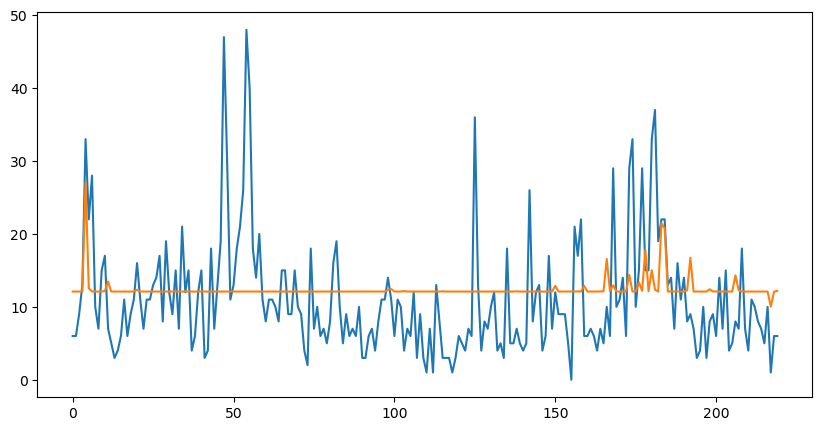

In [95]:
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(y_test.values)
ax.plot(y_pred)
plt.show()

In [112]:
from sklearn.svm import SVR
ilceler=train_df["ilce"].unique()
predictions=pd.DataFrame()
liste1=[]
for i in ilceler:
    data=train_df[train_df["ilce"]==i]
    y=data["bildirimsiz_sum"]
    x=data.drop(["ilce","bildirimsiz_sum"],axis=1)
    X_train=x[:int(len(x)*0.8)]
    X_test=x[int(len(x)*0.8):]
    y_train=y[:int(len(y)*0.8)]
    y_test=y[int(len(y)*0.8):]    
    svmr=SVR(kernel="poly",degree=4)
    svmr.fit(X_train,y_train)
    y_pred=svmr.predict(X_test)
    pred=[round(i) for i in y_pred]
    mae1=mean_absolute_error(y_test,y_pred)
    mae2=mean_absolute_error(y_test,pred)
    mae3=mean_absolute_error(y_test,y_pred.astype(int))
    liste1.append([i,mae1,mae2,mae3])
    data_test=test_df[test_df["ilce"]==i]
    data_test["prediction"]=lr.predict(data_test.drop(["ilce","tarih"],axis=1))
    predictions=pd.concat([predictions,data_test],axis=0,ignore_index=True)
mae_table=pd.DataFrame(liste1,columns=["ilce","orj_mae","round_mae","int_mae"])

In [113]:
predictions.head()

,tarih,ilce,max_wind_speed_10m:ms,max_prob_precip_1h:p,yil_sin,yil_cos,ay_sin,ay_cos,haftanin_gunu_sin,haftanin_gunu_cos,prediction
0,2024-02-01,izmir-aliaga,7.0,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969,0.825969
1,2024-02-02,izmir-aliaga,5.9,1.0,-0.280231,-0.959933,0.866025,0.5,-0.433884,-0.900969,0.722468
2,2024-02-03,izmir-aliaga,6.1,1.0,-0.280231,-0.959933,0.866025,0.5,-0.974928,-0.222521,0.674259
3,2024-02-04,izmir-aliaga,3.0,4.1,-0.280231,-0.959933,0.866025,0.5,-0.781831,0.623490,0.574015
4,2024-02-05,izmir-aliaga,4.7,1.0,-0.280231,-0.959933,0.866025,0.5,0.000000,1.000000,0.672305


In [114]:
mae_table

,ilce,orj_mae,round_mae,int_mae
0,izmir-aliaga,2.934054,2.959091,2.972727
1,izmir-kemalpasa,3.477618,3.477273,3.427273
2,izmir-guzelbahce,1.218007,1.195455,1.190909
3,izmir-bayrakli,2.553075,2.545455,2.550000
4,izmir-foca,2.551020,2.513636,2.863636
5,izmir-menderes,3.919959,3.913636,3.913636
6,izmir-bergama,4.029101,4.059091,4.109091
7,izmir-urla,3.929367,3.954545,3.759091
8,izmir-bayindir,3.033423,3.004545,3.027273
9,manisa-koprubasi,1.497077,1.454545,1.940909


In [115]:
display(mae_table["orj_mae"].mean(),mae_table["round_mae"].mean(),mae_table["int_mae"].mean())

2.989256316628189

2.9831789899469285

3.0243059374017864

In [116]:
predictions["tarih"]=predictions["tarih"].apply(lambda x: str(x)[:10])
predictions["unique_id"]=[str(predictions["tarih"][i])+"-"+str(predictions["ilce"][i]) for i in range(0,len(predictions))]
predictions["bildirimsiz_sum"]=[round(i) for i in predictions["prediction"]]
predictions.head()

,tarih,ilce,max_wind_speed_10m:ms,max_prob_precip_1h:p,yil_sin,yil_cos,ay_sin,ay_cos,haftanin_gunu_sin,haftanin_gunu_cos,prediction,unique_id,bildirimsiz_sum
0,2024-02-01,izmir-aliaga,7.0,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969,0.825969,2024-02-01-izmir-aliaga,1
1,2024-02-02,izmir-aliaga,5.9,1.0,-0.280231,-0.959933,0.866025,0.5,-0.433884,-0.900969,0.722468,2024-02-02-izmir-aliaga,1
2,2024-02-03,izmir-aliaga,6.1,1.0,-0.280231,-0.959933,0.866025,0.5,-0.974928,-0.222521,0.674259,2024-02-03-izmir-aliaga,1
3,2024-02-04,izmir-aliaga,3.0,4.1,-0.280231,-0.959933,0.866025,0.5,-0.781831,0.623490,0.574015,2024-02-04-izmir-aliaga,1
4,2024-02-05,izmir-aliaga,4.7,1.0,-0.280231,-0.959933,0.866025,0.5,0.000000,1.000000,0.672305,2024-02-05-izmir-aliaga,1


In [117]:
predictions.drop(["tarih","ilce","max_wind_speed_10m:ms","max_prob_precip_1h:p","yil_sin","yil_cos","ay_sin","ay_cos",
             "haftanin_gunu_sin","haftanin_gunu_cos","prediction"],axis=1,inplace=True)
submission1=pd.merge(submission,predictions,how="left",on="unique_id")
submission1.drop("bildirimsiz_sum_x",axis=1,inplace=True)
submission1.columns=["unique_id","bildirimsiz_sum"]
print(submission1.isnull().sum())
submission1.head()

unique_id          0
bildirimsiz_sum    0
dtype: int64


,unique_id,bildirimsiz_sum
0,2024-02-01-izmir-aliaga,1
1,2024-02-01-izmir-bayindir,1
2,2024-02-01-izmir-bayrakli,1
3,2024-02-01-izmir-bergama,1
4,2024-02-01-izmir-bornova,1


In [118]:
submission1.to_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\GDZ-Tahmin 11-SVM.csv",index=False)